In [ ]:
## Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score,roc_auc_score,precision_recall_curve,recall_score,roc_curve,accuracy_score,precision_score,classification_report,confusion_matrix
import math
%matplotlib inline

In [ ]:
X_domain = pd.read_csv("X_domain.csv")
X_anova = pd.read_csv("X_anova.csv")
Y = pd.read_csv("/Y.csv")

In [ ]:
X_domain.drop(labels="Unnamed: 0",axis=1,inplace=True)
X_anova.drop(labels="Unnamed: 0",axis=1,inplace=True)
Y.drop(labels="Unnamed: 0",axis=1,inplace=True)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_domain_train, X_domain_test, y_domain_train, y_domain_test = train_test_split(X_domain,Y, test_size=0.3, random_state=42)

X_anova_train, X_anova_test, y_anova_train, y_anova_test = train_test_split(X_anova,Y, test_size=0.3, random_state=50)

In [ ]:
X_domain_train = X_domain_train.to_numpy()
X_domain_test = X_domain_test.to_numpy()
y_domain_train = y_domain_train["0"].to_numpy()
y_domain_test = y_domain_test["0"].to_numpy()

X_anova_train = X_anova_train.to_numpy()
X_anova_test = X_anova_test.to_numpy()
y_anova_train = y_anova_train["0"].to_numpy()
y_anova_test = y_anova_test["0"].to_numpy()

## Code (functions) for threshold moving


In [ ]:
## Def here ...

def Find_Optimal_CutoffROC(tpr,fpr,y_pred,thresholds):
    gmeans=[]
    i=0
    for i in range (len(tpr)):
        gmeans.append(math.sqrt(tpr[i] * (1-fpr[i])))
    ix = np.argmax(gmeans)
    ROC(fpr,tpr,thresholds[ix],ix) 
    return thresholds[ix]

In [ ]:
def Find_Optimal_CutoffPR(pr,re,th,yvl):
    # convert to f score
    fscore = (2 * pr * re) / (pr+re+0.000001)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print("========================")
    print('Best Threshold Precision-Recall Curve=%f, F-Score=%.3f' % (th[ix], fscore[ix]))
    prcurve(yvl,pr,re,ix)
    print("========================")
    return th[ix]

In [ ]:
#function for results
def results(y_test,y_pred):
    acc=accuracy_score(y_test, y_pred)
    pre=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    print("========================")
    print("SCORES")
    print("Accuracy Score: ",acc)
    print("Precision Score: ",pre)
    print("Recall Score: ",rec)
    print("========================")
    y_actual = pd.Series(y_test, name='Actual')
    y_predict_tf = pd.Series(y_pred, name='Predicted')
    df_confusion = pd.crosstab(y_actual, y_predict_tf, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print("========================")
    print("CONFUSION Matrix")
    print(df_confusion)
    print("========================")   
    print(classification_report(y_test,y_pred))
    print("========================")

In [ ]:
#function for plotting ROC
def ROC(fpr,tpr,threshold,ix):
    plt.figure()
    plt.plot([0,1], [0,1], linestyle="--",label='No Skill') # plot random curve
    plt.plot(fpr, tpr, marker='', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    # show the plot
    plt.show()

In [ ]:
#plotting PR curve
def prcurve(testy,precision,recall,ix):
    no_skill = len(testy[testy==1]) / len(testy)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, label='Logistic')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
# show the plot
    plt.show() 

In [ ]:
#our_results
def our_results(X_train,X_test,y_train,y_test,y_pred):
    Y_pred = [1 if i >0.5 else 0 for i in y_pred]
    print("========================")
    print("==========BEFORE THRESHOLD==============")
    results(y_test,Y_pred)
    fpr,tpr, thresholds = roc_curve(y_test,y_pred)
    score= roc_auc_score(y_test, Y_pred)
    threshold_ROC=Find_Optimal_CutoffROC(tpr,fpr,y_pred,thresholds)
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    threshold_PR=Find_Optimal_CutoffPR(precision,recall,th,y_test)
    print("========================")
    print('ROC AUC score:',score)
    print("Threshold for ROC: ",threshold_ROC)
    print("========================")
    Y_pred = [1 if i >threshold_ROC else 0 for i in y_pred]
    print("==========AFTER THRESHOLD ROC==============")
    results(y_test,Y_pred)
    print("========================")
    Y_pred = [1 if i >threshold_PR else 0 for i in y_pred]
    print("==========AFTER THRESHOLD PR CURVE==============")
    results(y_test,Y_pred)

## Models used

*   Logistic regression
*   SVC
*   Neural Network

### ANOVA Features

In [ ]:
## Building Neural Network
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

from keras.utils.vis_utils import plot_model

input_dim = X_anova_train.shape[1]


In [ ]:
model = Sequential()
model.add(Dense(input_dim, input_shape=(input_dim,), activation='sigmoid',name="first"))
model.add(Dense(input_dim/2, activation='sigmoid',name="second"))
model.add(Dense(1, activation='sigmoid',name="output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 20)                420       
_________________________________________________________________
second (Dense)               (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

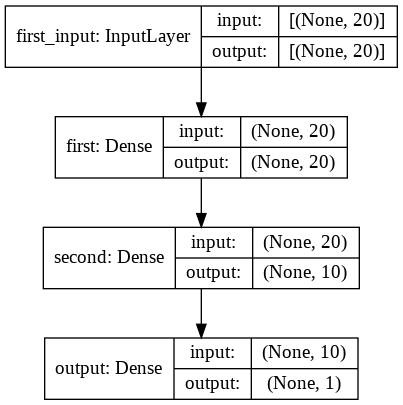

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
my_models = {
    'SVM':{'model':svm.SVC(gamma='auto',C=5,kernel='rbf'),
           'params': {'C': [1,2,3,4,5,6,7,8,9,10],
                      "kernel" :["linear","poly","sigmoid"]}},
    'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),
                             'params': {'C': [1,2,3,4,5,6,7,8,9,10],
                                        "penalty":["l1","l2"]}}
}

In [ ]:
scores = []

for model_name, mp in my_models.items():
    clf =  GridSearchCV(mp['model'],mp['params'] ,cv= 5, return_train_score=False)
    clf.fit(X_anova_train, y_anova_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [ ]:
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

,model,best_score,best_params
0,SVM,0.968783,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.970249,"{'C': 1, 'penalty': 'l1'}"


Logistic regression performs better

In [ ]:
ypred = clf.predict_proba(X_anova_test)[:,1]

ypred.shape

(2046,)

In [ ]:
y_anova_test.shape

(2046,)

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.967741935483871
Precision Score:  0.7777777777777778
Recall Score:  0.09859154929577464
CONFUSION Matrix
Predicted     0  1   All
Actual                  
0.0        1973  2  1975
1.0          64  7    71
All        2037  9  2046
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1975
         1.0       0.78      0.10      0.17        71

    accuracy                           0.97      2046
   macro avg       0.87      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



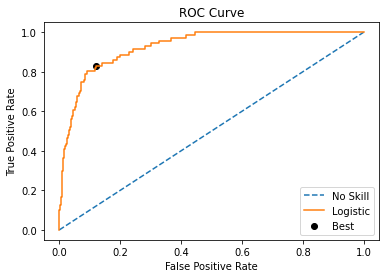

Best Threshold Precision-Recall Curve=0.144564, F-Score=0.443


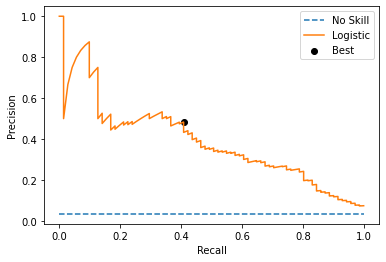

ROC AUC score: 0.5487894455339634
Threshold for ROC:  0.04601240164093647
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.8778103616813294
Precision Score:  0.19661016949152543
Recall Score:  0.8169014084507042
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0.0        1738  237  1975
1.0          13   58    71
All        1751  295  2046
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1975
         1.0       0.20      0.82      0.32        71

    accuracy                           0.88      2046
   macro avg       0.59      0.85      0.62      2046
weighted avg       0.96      0.88      0.91      2046

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.9638318670576735
Precision Score:  0.4745762711864407
Recall Score:  0.39436619718309857
CONFUSION Matrix
Predicted     0   1   All
Actual                   
0.0        1944  31  1975
1.0          43  28    71
All

In [ ]:
## def our_results(X_train,X_test,y_train,y_test,y_pred)

our_results(X_anova_train, 
            X_anova_train, 
            y_anova_train, 
            y_anova_test, 
            ypred)

In [ ]:
history_dropout = model.fit(
    X_anova_train,
    y_anova_train,
    epochs=500,
    batch_size=100,
    validation_split=0.2,
    shuffle=True,
    workers=2
)

Epoch 1/500
39/39 [==============================] - 1s 17ms/step - loss: 0.5461 - accuracy: 0.9684 - val_loss: 0.3827 - val_accuracy: 0.9634
Epoch 2/500
39/39 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.9694 - val_loss: 0.2644 - val_accuracy: 0.9634
Epoch 3/500
39/39 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9702 - val_loss: 0.2099 - val_accuracy: 0.9634
Epoch 4/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9705 - val_loss: 0.1842 - val_accuracy: 0.9634
Epoch 5/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9684 - val_loss: 0.1715 - val_accuracy: 0.9634
Epoch 6/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.9706 - val_loss: 0.1645 - val_accuracy: 0.9634
Epoch 7/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9704 - val_loss: 0.1607 - val_accuracy: 0.9634
Epoch 8/500


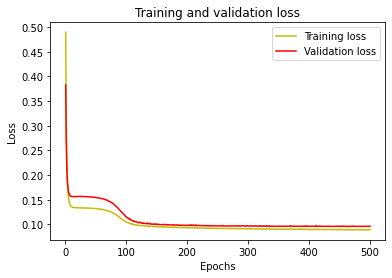

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

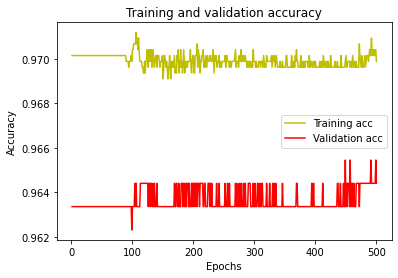

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9682306940371457
Precision Score:  0.875
Recall Score:  0.09859154929577464
CONFUSION Matrix
Predicted     0  1   All
Actual                  
0.0        1974  1  1975
1.0          64  7    71
All        2038  8  2046
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1975
         1.0       0.88      0.10      0.18        71

    accuracy                           0.97      2046
   macro avg       0.92      0.55      0.58      2046
weighted avg       0.97      0.97      0.96      2046



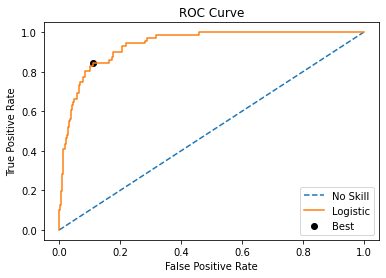

Best Threshold Precision-Recall Curve=0.231576, F-Score=0.464


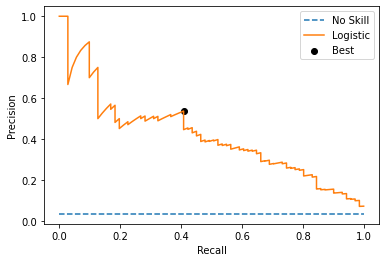

ROC AUC score: 0.5490426100909254
Threshold for ROC:  0.047394305
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.8885630498533724
Precision Score:  0.21454545454545454
Recall Score:  0.8309859154929577
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0.0        1759  216  1975
1.0          12   59    71
All        1771  275  2046
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1975
         1.0       0.21      0.83      0.34        71

    accuracy                           0.89      2046
   macro avg       0.60      0.86      0.64      2046
weighted avg       0.97      0.89      0.92      2046

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.9667644183773216
Precision Score:  0.5283018867924528
Recall Score:  0.39436619718309857
CONFUSION Matrix
Predicted     0   1   All
Actual                   
0.0        1950  25  1975
1.0          43  28    71
All        

In [ ]:
## def our_results(X_train,X_test,y_train,y_test,y_pred)
y_pred = model.predict(X_anova_test)
our_results(X_anova_train,
            X_anova_test,
            y_anova_train,
            y_anova_test,
            y_pred)

### Domain Features

In [ ]:
## Building Neural Network
input_dim = X_domain_train.shape[1]

model = Sequential()
model.add(Dense(input_dim, input_shape=(input_dim,), activation='sigmoid',name="first"))
model.add(Dense(input_dim/2, activation='sigmoid',name="second"))
model.add(Dense(1, activation='sigmoid',name="output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 18)                342       
_________________________________________________________________
second (Dense)               (None, 9)                 171       
_________________________________________________________________
output (Dense)               (None, 1)                 10        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

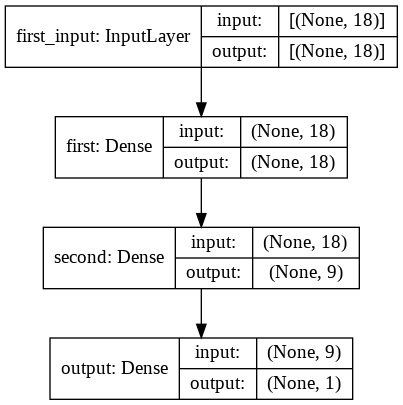

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
my_models = {
    'SVM':{'model':svm.SVC(gamma='auto',C=5,kernel='rbf'),'params': {'C': [1,2,5]}},
    'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),'params': {'C': [1,2,5]}}
}

In [ ]:

scores = []

for model_name, mp in my_models.items():
    clf =  GridSearchCV(mp['model'],mp['params'] ,cv= 2, return_train_score=False)
    clf.fit(X_domain_train, y_domain_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [ ]:
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

,model,best_score,best_params
0,SVM,0.965011,{'C': 1}
1,logistic_regression,0.936511,{'C': 1}


In [ ]:
ypred = clf.predict_proba(X_domain_test)[:,1]

ypred.shape

(2046,)

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9618768328445748
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
Predicted     0   All
Actual               
0.0        1968  1968
1.0          78    78
All        2046  2046
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1968
         1.0       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


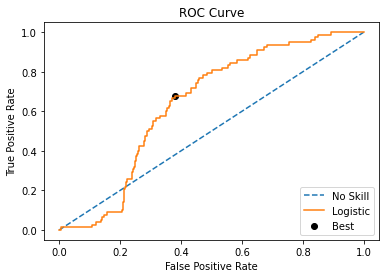

Best Threshold Precision-Recall Curve=0.033641, F-Score=0.121


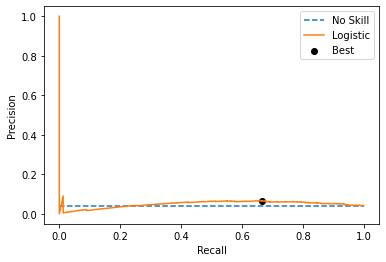

ROC AUC score: 0.5
Threshold for ROC:  0.03273247156732665
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.6231671554252199
Precision Score:  0.06524466750313676
Recall Score:  0.6666666666666666
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0.0        1223  745  1968
1.0          26   52    78
All        1249  797  2046
              precision    recall  f1-score   support

         0.0       0.98      0.62      0.76      1968
         1.0       0.07      0.67      0.12        78

    accuracy                           0.62      2046
   macro avg       0.52      0.64      0.44      2046
weighted avg       0.94      0.62      0.74      2046

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.6304985337243402
Precision Score:  0.06538461538461539
Recall Score:  0.6538461538461539
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0.0        1239  729  1968
1.0          27   51    78
All        126

In [ ]:
## def our_results(X_train,X_test,y_train,y_test,y_pred)

our_results(X_domain_train, 
            X_domain_train, 
            y_domain_train, 
            y_domain_test, 
            ypred)

In [ ]:
history_dropout = model.fit(
    X_domain_train,
    y_domain_train,
    epochs=500,
    batch_size=100,
    validation_split=0.2,
    shuffle=True,
    workers=2
)

Epoch 1/500
39/39 [==============================] - 1s 17ms/step - loss: 0.8505 - accuracy: 0.0317 - val_loss: 0.6994 - val_accuracy: 0.1424
Epoch 2/500
39/39 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7617 - val_loss: 0.5406 - val_accuracy: 0.9717
Epoch 3/500
39/39 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.9739 - val_loss: 0.4239 - val_accuracy: 0.9717
Epoch 4/500
39/39 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.9734 - val_loss: 0.3404 - val_accuracy: 0.9717
Epoch 5/500
39/39 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.9698 - val_loss: 0.2820 - val_accuracy: 0.9717
Epoch 6/500
39/39 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9704 - val_loss: 0.2407 - val_accuracy: 0.9717
Epoch 7/500
39/39 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9651 - val_loss: 0.2117 - val_accuracy: 0.9717
Epoch 8/500


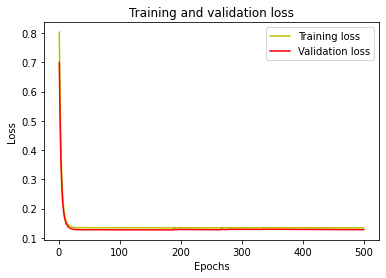

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

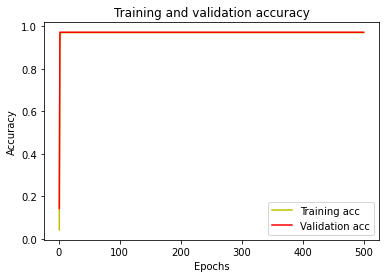

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9618768328445748
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
Predicted     0   All
Actual               
0.0        1968  1968
1.0          78    78
All        2046  2046
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1968
         1.0       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


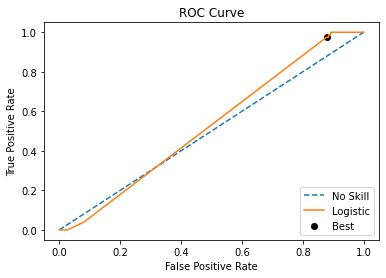

Best Threshold Precision-Recall Curve=0.017211, F-Score=0.082


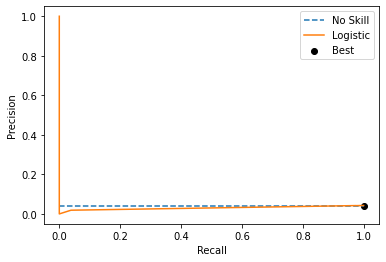

ROC AUC score: 0.5
Threshold for ROC:  0.032475114
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.8866080156402737
Precision Score:  0.01875
Recall Score:  0.038461538461538464
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0.0        1811  157  1968
1.0          75    3    78
All        1886  160  2046
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1968
         1.0       0.02      0.04      0.03        78

    accuracy                           0.89      2046
   macro avg       0.49      0.48      0.48      2046
weighted avg       0.92      0.89      0.90      2046

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.14173998044965788
Precision Score:  0.04203056768558952
Recall Score:  0.9871794871794872
CONFUSION Matrix
Predicted    0     1   All
Actual                    
0.0        213  1755  1968
1.0          1    77    78
All        214  1832  2046
    

In [ ]:
## def our_results(X_train,X_test,y_train,y_test,y_pred)
y_pred = model.predict(X_domain_test)
our_results(X_domain_train,
            X_domain_test,
            y_domain_train,
            y_domain_test,
            y_pred)